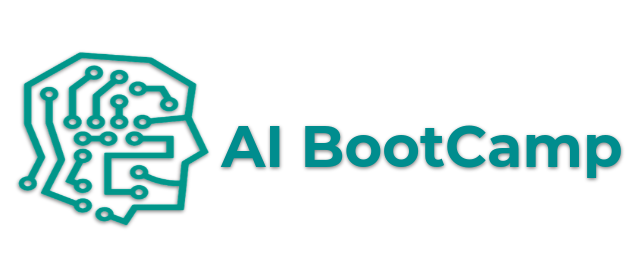

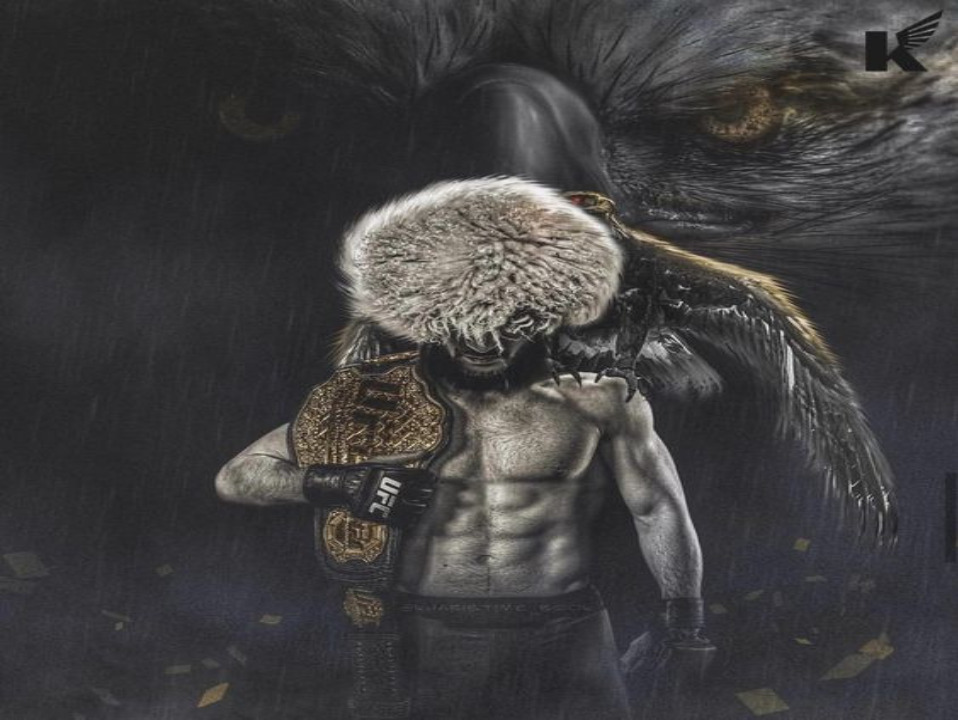

<a>https://www.kaggle.com/rishpande</a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [7]:
import cufflinks as cf

In [8]:
init_notebook_mode(connected=True)

In [9]:
cf.go_offline()

In [10]:
%matplotlib inline

In [11]:
from plotly import tools

In [12]:
import chart_studio.plotly as py

In [13]:
import plotly.graph_objs as go

In [14]:
import plotly.figure_factory as ff

In [15]:
import plotly.offline as offline

In [16]:
import squarify

In [17]:
import random

In [18]:
import operator

In [19]:
df=pd.read_csv('data.csv')

In [20]:
df.head(2)

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


* BPrev: Previous fights by 'Blue' fighter
* B_Age: Age of 'Blue' fighter
* B_Height: Height of 'Blue' fighter
* B_Weight: Weight of 'Blue' fighter
* B_Location: Location of 'Blue' fighter
* B_HomeTown: Hometown of 'Blue' fighter

* RPrev: Previous fights by 'Red' fighter
* R_Age: Age of 'Red' fighter
* R_Height: Height of 'Red' fighter
* R_Weight: Weight of 'Red' fighter
* R_Location: Location of 'Red' fighter
* R_HomeTown: Hometown of 'Red' fighter
* Date: Date of the fight
* winby: How did the fighter win the fight(decision,submission KO etc.)

In [22]:
df.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [23]:
print('Number of records: ',df.shape[0])
print('Number of Blue fighters: ',len(df.B_ID.unique()))
print('Number of Red fighters: ',len(df.R_ID.unique()))


Number of records:  1477
Number of Blue fighters:  715
Number of Red fighters:  627


In [24]:
df.isnull().sum(axis=0)

BPrev                                 0
BStreak                               0
B_Age                                 3
B_Height                              1
B_HomeTown                            6
                                   ... 
R__Round5_TIP_Neutral Time         1333
R__Round5_TIP_Side Control Time    1333
R__Round5_TIP_Standing Time        1333
winby                                16
winner                                0
Length: 895, dtype: int64

In [25]:
df['B_Age']=df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height']=df['B_Height'].fillna(np.mean(df['B_Height']))

In [26]:
df['R_Age']=df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height']=df['R_Height'].fillna(np.mean(df['R_Height']))

In [27]:
temp=df['winner'].value_counts()
fig={
    'data':[
        {
            'values':temp.values,
            'labels':temp.index,
            'domain': {'x':[0,1]},
            'hole':.6,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'winner',
        'annotations':[
            {
                'font':{
                    'size':17
                },
                'showarrow':False,
                'text':'Whos winning more',
                'x':0.5,
                'y':0.5
            }
        ]
    }
}
iplot(fig,filename='donut')

<AxesSubplot:xlabel='R_Age', ylabel='Density'>

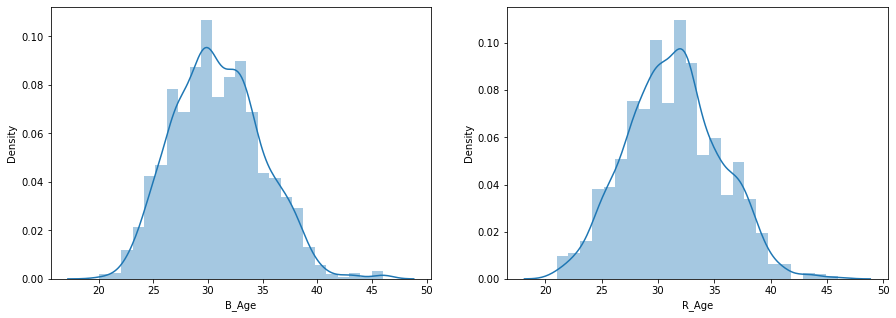

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df.B_Age,ax=ax[0])
sns.distplot(df.R_Age,ax=ax[1])

In [29]:
BAge=df.groupby(['B_Age']).count()['winner']
BlueAge=BAge.sort_values(axis=0,ascending=False)
BlueAge.head(10)

B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
Name: winner, dtype: int64

In [30]:
RAge=df.groupby(['R_Age']).count()['winner']
RedAge=RAge.sort_values(axis=0,ascending=False)
RedAge.head(10)

R_Age
32.0    169
30.0    156
33.0    141
28.0    116
31.0    114
29.0    111
35.0     92
34.0     81
27.0     78
37.0     76
Name: winner, dtype: int64

Text(0.5, 1.0, 'Age of Red fighters')

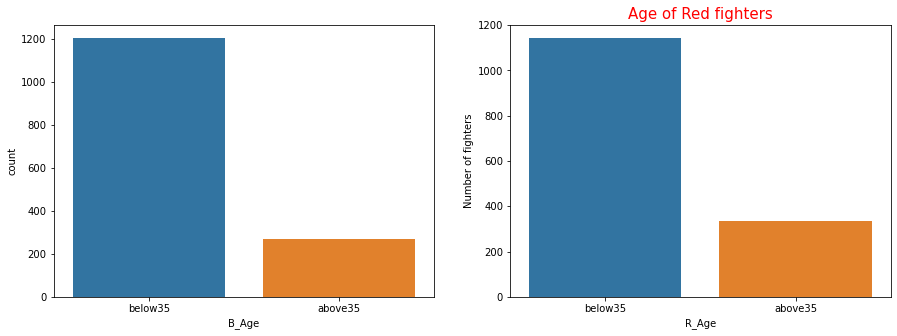

In [31]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
above35=['above35' if i>=35 else 'below35' for i in df.B_Age]
df_B=pd.DataFrame({'B_Age':above35})
sns.countplot(x=df_B.B_Age,ax=ax[0])
plt.ylabel('Number of fighters')
plt.title('Age of Blue fighters',color='blue',fontsize=15)

above35=['above35' if i>=35 else 'below35' for i in df.R_Age]
df_R=pd.DataFrame({'R_Age':above35})
sns.countplot(x=df_R.R_Age,ax=ax[1])
plt.ylabel('Number of fighters')
plt.title('Age of Red fighters',color='Red',fontsize=15)


In [32]:
df['Age_Difference']=df.B_Age-df.R_Age
df[['Age_Difference','winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.459711
draw,-1.555556
no contest,0.058824
red,0.273304


<AxesSubplot:xlabel='R_Height', ylabel='Density'>

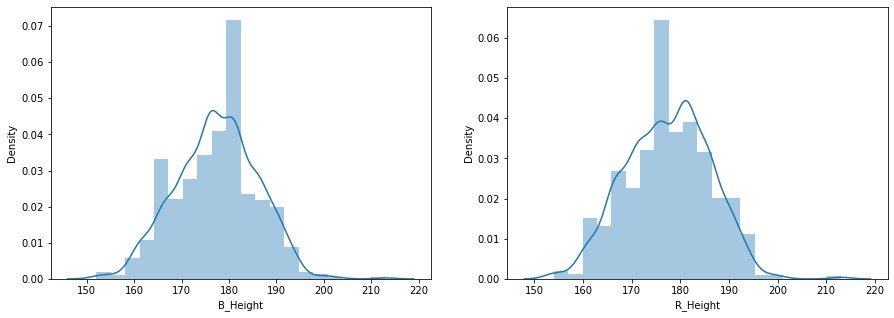

In [33]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df.B_Height,bins=20,ax=ax[0]) #Blue
sns.distplot(df.R_Height,bins=20,ax=ax[1]) #Red

<AxesSubplot:xlabel='B_Height', ylabel='Density'>

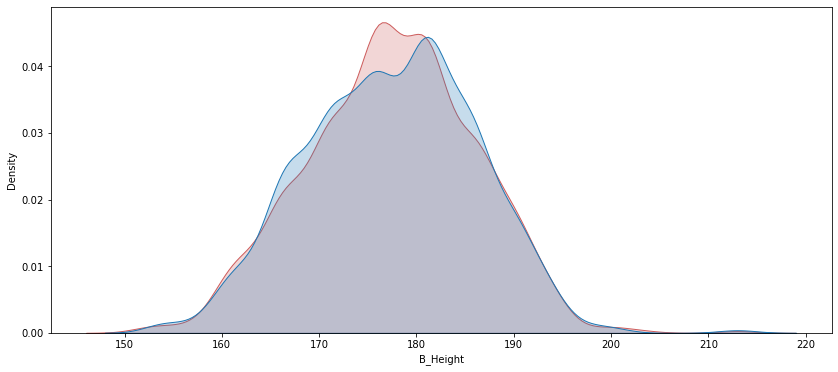

In [34]:
fig,ax=plt.subplots(figsize=(14,6))
sns.kdeplot(df.B_Height,shade=True,color='indianred',label='Red')
sns.kdeplot(df.R_Height,shade=True,label='Blue')

In [35]:
df['Height Difference']=df.B_Height-df.R_Height
df[['Height Difference','winner']].groupby('winner').mean()

,Height Difference
winner,
blue,0.118151
draw,2.444444
no contest,-1.411765
red,-0.052536


In [36]:
temp=df['winby'].value_counts()
fig={
    'data':[
        {
            'values':temp.values,
            'labels':temp.index,
            'domain': {'x':[0,1]},
            'hole':.6,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'How the fighters are winning?',
        'annotations':[
            {
                'font':{
                    'size':20
                },
                'showarrow':False,
                'text':'Win by',
                'x':0.50,
                'y':0.5
            }
        ]
    }
}
iplot(fig,filename='donut')

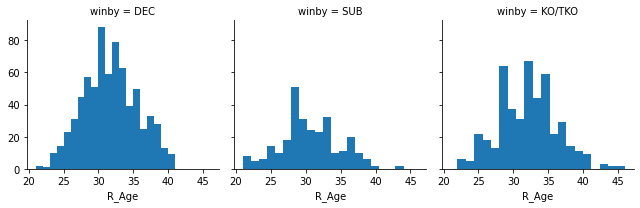

In [39]:
g=sns.FacetGrid(df,col='winby')
g.map(plt.hist,'R_Age',bins=20)

In [40]:
cnt_srs=df['R_Location'].value_counts().head(15)

In [41]:
cnt_srs

Rio de Janeiro Brazil                    67
Montreal, Quebec Canada                  30
Coconut Creek, Florida United States     29
Denver, Colorado USA                     29
Coconut Creek, Florida USA               29
Las Vegas, Nevada USA                    24
Sao Paulo Brazil                         22
Albuquerque, New Mexico United States    21
Dublin Ireland                           19
Albuquerque, New Mexico USA              18
Sacramento, California USA               17
Chicago, Illinois USA                    15
San Jose, California USA                 14
Los Angeles, California USA              14
Boca Raton, Florida USA                  14
Name: R_Location, dtype: int64

In [42]:
type(cnt_srs)

pandas.core.series.Series

In [43]:
trace=go.Bar(x=cnt_srs.index,y=cnt_srs.values,
            marker=dict(color=cnt_srs.values))

In [44]:
layout=go.Layout(title='Most Popular cities for Red Fighters')

In [45]:
data=[trace]

In [46]:
fig=go.Figure(data=data,layout=layout)

In [47]:
offline.iplot(fig,filename='Ratio')

In [48]:
cnt_srs=df['B_Location'].value_counts().head(15)

In [49]:
trace=go.Bar(x=cnt_srs.index,y=cnt_srs.values,
            marker=dict(color=cnt_srs.values))

In [50]:
layout=go.Layout(title='Most Popular cities for Blue Fighters')

In [51]:
data=[trace]

In [52]:
fig=go.Figure(data=data,layout=layout)

In [53]:
offline.iplot(fig,filename='Ratio')

In [57]:
r1=df[['B_Weight','B__Round1_Grappling_Reversals_Landed','B__Round1_Grappling_Standups_Landed',
     'B__Round1_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

In [56]:
df.columns

Index(['BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_ID',
       'B_Location', 'B_Name', 'B_Weight',
       'B__Round1_Grappling_Reversals_Landed',
       ...
       'R__Round5_TIP_Half Guard Control Time',
       'R__Round5_TIP_Misc. Ground Control Time',
       'R__Round5_TIP_Mount Control Time', 'R__Round5_TIP_Neutral Time',
       'R__Round5_TIP_Side Control Time', 'R__Round5_TIP_Standing Time',
       'winby', 'winner', 'Age_Difference', 'Height Difference'],
      dtype='object', length=897)

In [58]:
type(r1)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='B_Weight'>

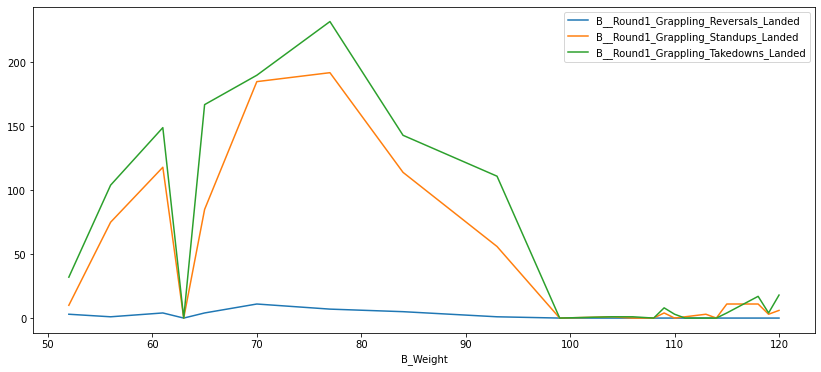

In [59]:
r1.plot(kind='line',figsize=(14,6))

In [60]:
r5=df[['B_Weight','B__Round5_Grappling_Reversals_Landed','B__Round5_Grappling_Standups_Landed',
     'B__Round5_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

<AxesSubplot:xlabel='B_Weight'>

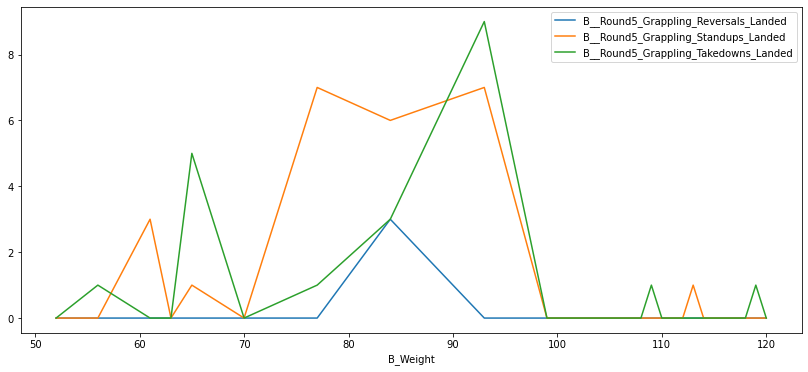

In [62]:
r5.plot(kind='line',figsize=(14,6))

In [63]:
r1=df[['R_Weight','R__Round1_Grappling_Reversals_Landed','R__Round1_Grappling_Standups_Landed',
     'R__Round1_Grappling_Takedowns_Landed']].groupby('R_Weight').sum()

<AxesSubplot:xlabel='R_Weight'>

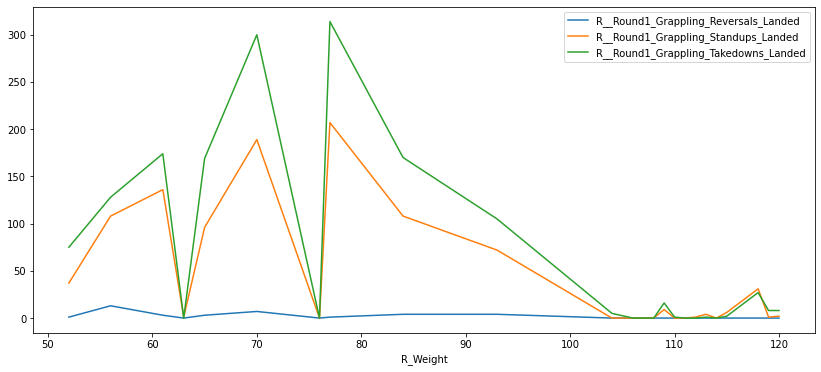

In [64]:
r1.plot(kind='line',figsize=(14,6))

In [65]:
r5=df[['R_Weight','R__Round5_Grappling_Reversals_Landed','R__Round5_Grappling_Standups_Landed',
     'R__Round5_Grappling_Takedowns_Landed']].groupby('R_Weight').sum()

<AxesSubplot:xlabel='R_Weight'>

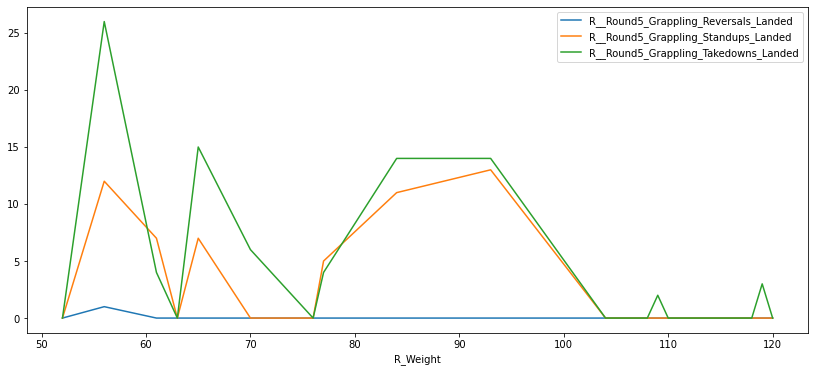

In [67]:
r5.plot(kind='line',figsize=(14,6))

In [74]:
clin_r1=df[['B_Weight','B__Round1_Strikes_Clinch Head Strikes_Landed','B__Round1_Strikes_Clinch Leg Strikes_Landed','B__Round1_Strikes_Clinch Body Strikes_Landed']]

In [69]:
df.columns

Index(['BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_ID',
       'B_Location', 'B_Name', 'B_Weight',
       'B__Round1_Grappling_Reversals_Landed',
       ...
       'R__Round5_TIP_Half Guard Control Time',
       'R__Round5_TIP_Misc. Ground Control Time',
       'R__Round5_TIP_Mount Control Time', 'R__Round5_TIP_Neutral Time',
       'R__Round5_TIP_Side Control Time', 'R__Round5_TIP_Standing Time',
       'winby', 'winner', 'Age_Difference', 'Height Difference'],
      dtype='object', length=897)

In [75]:
clin_r1

,B_Weight,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Landed
0,84,0.0,0.0,0.0
1,70,NaN,NaN,NaN
2,70,0.0,0.0,0.0
3,56,NaN,NaN,NaN
4,61,1.0,1.0,2.0
...,...,...,...,...
1472,61,NaN,NaN,NaN
1473,56,0.0,0.0,0.0
1474,93,5.0,0.0,2.0
1475,52,0.0,0.0,8.0


In [76]:
clin_r1=clin_r1.groupby('B_Weight').sum()

<AxesSubplot:xlabel='B_Weight'>

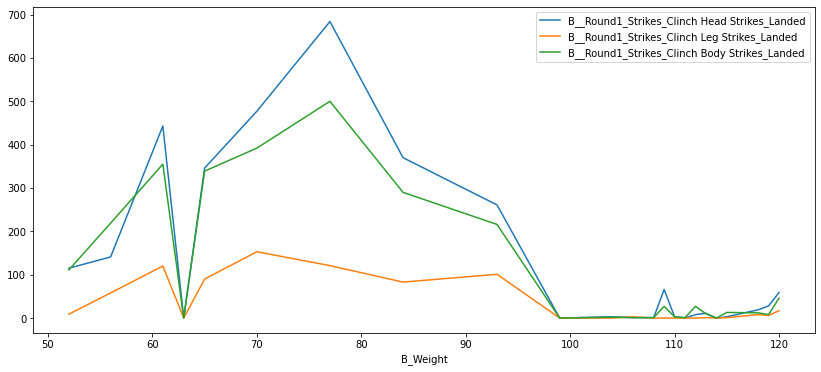

In [77]:
clin_r1.plot(kind='line',figsize=(14,6))

In [78]:
clin_r5=df[['B_Weight','B__Round5_Strikes_Clinch Head Strikes_Landed','B__Round5_Strikes_Clinch Leg Strikes_Landed','B__Round5_Strikes_Clinch Body Strikes_Landed']]

In [79]:
clin_r5=clin_r5.groupby('B_Weight').sum()

<AxesSubplot:xlabel='B_Weight'>

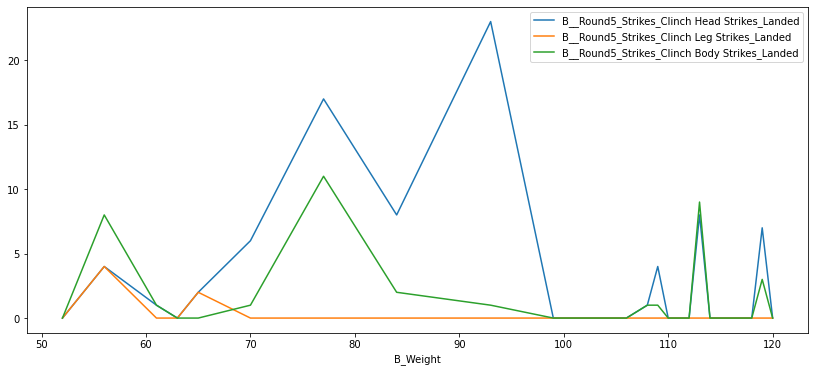

In [81]:
clin_r5.plot(kind='line',figsize=(14,6))

In [82]:
clin_r1=df[['R_Weight','R__Round1_Strikes_Clinch Head Strikes_Landed','R__Round1_Strikes_Clinch Leg Strikes_Landed','R__Round1_Strikes_Clinch Body Strikes_Landed']]

In [83]:
clin_r1=clin_r1.groupby('R_Weight').sum()

<AxesSubplot:xlabel='R_Weight'>

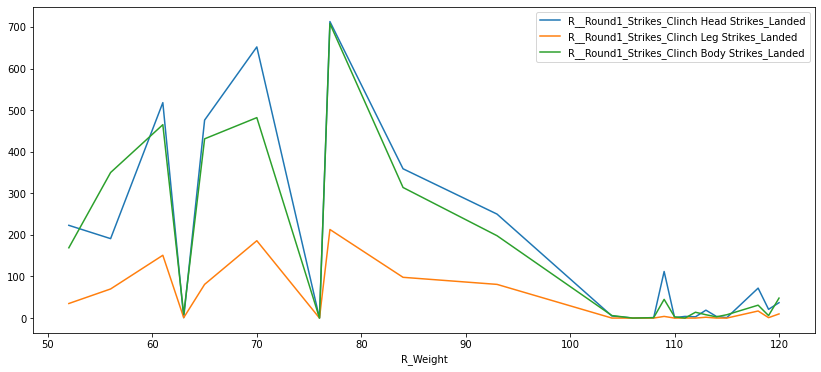

In [84]:
clin_r1.plot(kind='line',figsize=(14,6))

In [86]:
clin_r5=df[['R_Weight','R__Round5_Strikes_Clinch Head Strikes_Landed','R__Round5_Strikes_Clinch Leg Strikes_Landed','R__Round5_Strikes_Clinch Body Strikes_Landed']]

In [87]:
clin_r5=clin_r5.groupby('R_Weight').sum()

<AxesSubplot:xlabel='R_Weight'>

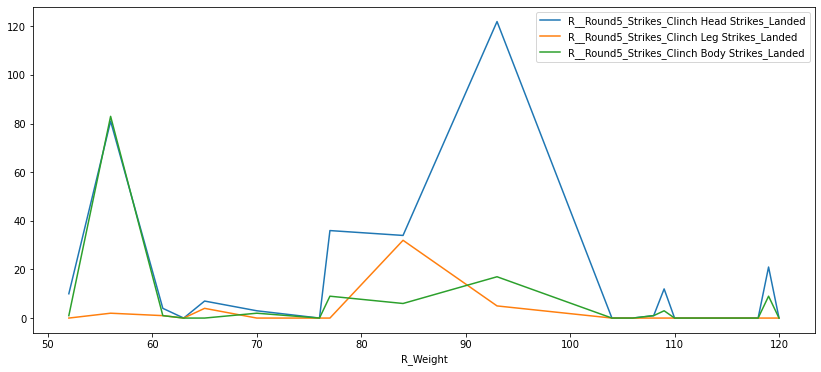

In [88]:
clin_r5.plot(kind='line',figsize=(14,6))